In [2]:
import glob
import numpy as np # scientifique computation
import pandas as pd # data manipulation
from matplotlib import pyplot as plt # dataviz
import seaborn as sns
%matplotlib notebook
%matplotlib inline
pd.options.display.max_columns = None

# split dataset & prepare 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline

# ML model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# DL model
from sklearn.neural_network import MLPRegressor

# metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
path_to_interim = '../data/interim/'
files = sorted(glob.glob(path_to_interim+'*'))

# upload dataset
df = pd.read_csv(files[0])

# choose relevant features
to_drop = ['engine_id', 'time_cycle', 'max_cycle', 'HI'] # id/label cols
cst_features = ['op_set_3', 'sensor_18', 'sensor_19'] # constant features
quasi_cst_features = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16'] # quasi-constant features
high_corr_to_drop = ['sensor_14'] # drop corrected core speed - sensor 14
discreet_features = ['op_set_2', 'sensor_17']

# keep the ones to use for ML
cols_to_keep = [x for x in df.columns if x not in 
                to_drop + cst_features + quasi_cst_features + ['RUL']]

cols_to_keep_2 = [x for x in df.columns if x not in 
                to_drop + cst_features + quasi_cst_features + high_corr_to_drop + discreet_features + ['RUL']]

In [14]:
df

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.994792
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.989583
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.984375
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.979167
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.973958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4,0.020000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3,0.015000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2,0.010000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1,0.005000


In [15]:
X

,op_set_1,op_set_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,HI
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.994792
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.989583
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.984375
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.979167
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.973958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,0.020000
20627,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,0.015000
20628,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,0.010000
20629,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,0.005000


In [16]:
# assign target and features
y = df['RUL']
X = df[cols_to_keep]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# features scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(16504, 16) (4127, 16)
(16504,) (4127,)


In [17]:
pd.DataFrame(X_train) 
X_train.shape

(16504, 16)

In [18]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04
mean,1.035957e-17,-1.607886e-16,-1.063238e-13,-9.589464e-16,8.964607e-15,-1.612939e-13,-3.131403e-12,-3.292754e-15,1.203847e-14,4.077680e-14,8.344320e-12,5.479336e-14,-2.007335e-17,-4.022365e-15,-1.930131e-14,4.569846e-14
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.976916e+00,-2.056856e+00,-2.938678e+00,-3.172346e+00,-2.966727e+00,-3.956183e+00,-2.771903e+00,-1.869384e+00,-2.587606e+00,-3.499778e+00,-2.997504e+00,-2.291070e+00,-3.126635e+00,-3.367325e+00,-3.623265e+00,-3.639569e+00
25%,-6.789937e-01,-1.031152e+00,-7.251406e-01,-6.938832e-01,-7.303655e-01,-6.354530e-01,-6.587705e-01,-5.495113e-01,-7.157672e-01,-6.153261e-01,-7.791816e-01,-5.543735e-01,-7.256746e-01,-7.825025e-01,-6.418053e-01,-6.269931e-01
50%,8.073512e-03,-5.448377e-03,-6.706185e-02,-6.887953e-02,-1.045843e-01,8.497643e-02,-9.526851e-02,-2.077898e-01,-1.167789e-01,8.885929e-02,-8.595595e-02,-1.709504e-01,-8.612913e-02,-1.362968e-01,7.595360e-02,7.388444e-02
75%,6.951407e-01,6.783540e-01,6.508422e-01,6.289125e-01,6.245675e-01,7.266089e-01,6.091090e-01,1.861314e-01,5.945196e-01,7.253345e-01,6.072697e-01,2.358410e-01,6.233667e-01,5.099089e-01,7.385002e-01,7.121343e-01
max,3.993063e+00,2.045959e+00,3.681993e+00,4.288661e+00,3.617869e+00,2.809100e+00,6.525880e+00,8.085299e+00,3.701771e+00,2.661844e+00,6.430365e+00,7.828063e+00,3.799110e+00,4.387143e+00,3.388687e+00,3.030280e+00


In [19]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

print(f'R² score : {svr.score(X_train, y_train)}')
y_pred = svr.predict(X_test)

R² score : 0.5661444544316434


In [20]:
print(f'R² score : {r2_score(y_test, y_pred)}')
print(f'MSE      : {mean_squared_error(y_test, y_pred)}')

R² score : 0.5575576364089707
MSE      : 2091.0620102098806


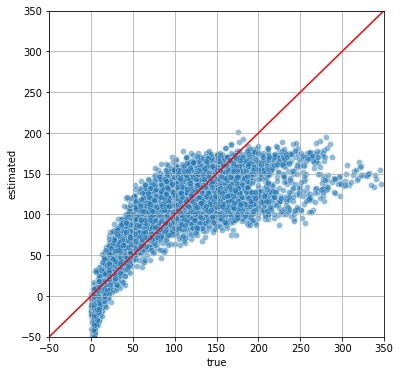

In [27]:
def plot_rul_true_estimated():

    # reset index y_test
    y_test.reset_index(drop=True, inplace=True)

    # create RUL df to compute error,d and score,s
    RUL = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1, ignore_index=True )
    RUL.rename(columns={0:'true', 1:'estimated'}, inplace=True)

    # cast as int
    RUL['estimated'] = [int(i) for i in RUL['estimated']]

    # compute error d
    RUL['error'] = RUL['estimated'] - RUL['true']
    
    # plotting
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=RUL, x='true', y='estimated', alpha=0.5)
    sns.lineplot(x=np.arange(-50,350), y=np.arange(-50,350), color = 'red')
    plt.xlim(-50,350)
    plt.ylim(-50,350)
    plt.grid()
    plt.show()
    
plot_rul_true_estimated()    